In [194]:
import pandas as pd
import pickle
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib.pyplot import figure

In [229]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

## Holbrook Data Analysis

In [36]:
input_path_files = "/Users/robertyoung/git_repos/nlp_phoneme_spelling/input_files/spelling_correction_dicts/"

In [37]:
file_name_h_pyspell = "holbrook_pyspell_dict.txt"
holbrook_pyspell = pickle.load(open(input_path_files + file_name_h_pyspell, "rb"))

In [38]:
file_name_h_symspell = "holbrook_symspell_dict.txt"
holbrook_symspell = pickle.load(open(input_path_files + file_name_h_symspell, "rb"))

In [39]:
file_name_h_phonemes = "holbrook_phonemes_sym.txt"
holbrook_phonemes = pickle.load(open(input_path_files + file_name_h_phonemes, "rb"))

### Comparison 1 - Python SpellChecker vs CMU 0.5

In [40]:
df_spellcheck_vs_cmu = pd.DataFrame(columns=['Spelling Application', 'Correct', 'Luck', 'Correct_and_Luck'])

In [41]:
results_data = []

In [582]:
def score_application(name, input_dict):
    correct = 0
    luck = 0
    for misspelling, results in input_dict.items():    
        if results['correct_spelling'] == results['suggested']:
            correct += 1
        if results['correct_spelling'] in results['candidates']:
            luck += 1
            
    correct_and_luck = correct + luck
    
    results = {'Spelling Application':name, 'Correct':correct, 'Luck':luck, 'Correct_and_Luck':correct_and_luck}

    return results

In [43]:
results_data.append(score_application('PySpell', holbrook_pyspell))

In [44]:
results_data.append(score_application('CMU Phonemes', holbrook_phonemes))

### Comparison 2 - SymSpell vs CMU 0.5

In [46]:
results_data.append(score_application('SymSpell', holbrook_symspell))

In [47]:
df_spellcheck_vs_cmu.append(results_data)

,Spelling Application,Correct,Luck,Correct_and_Luck
0,PySpell,448,633,1081
1,CMU Phonemes,355,133,488
2,SymSpell,429,474,903


### Comparison 3 - Python SpellChecker vs SymSpell Frequency Dict 0.5

# Overlap

In [153]:
def overlap(dict_1, dict_2, dict_1_name, dict_2_name, data_name, comparison_name):
    
    path = "results/" + data_name + "/" + comparison_name + "/"
    
    both_correct_count = 0
    dict_1_correct_count = 0
    dict_2_correct_count = 0
    
    both_correct_list = []
    dict_1_correct_list = []
    dict_2_correct_list = []
    
    for key in dict_1.keys():
        
        if dict_1[key]['suggested'] == dict_2[key]['suggested']:
            if dict_1[key]['suggested'] == dict_1[key]['correct_spelling']:
                both_correct_count +=1
                mispelling = key
                suggestion = dict_1[key]['correct_spelling']
                both_correct_list.append({'Mispelling':mispelling, 'Suggestion':suggestion})
                
        elif dict_1[key]['suggested'] == dict_1[key]['correct_spelling']:
            dict_1_correct_count += 1
            mispelling = key
            suggestion = dict_1[key]['correct_spelling']
            dict_1_correct_list.append({'Mispelling':mispelling, 'suggestion':suggestion})
            
            
        elif dict_2[key]['suggested'] == dict_2[key]['correct_spelling']:
            dict_2_correct_count +=1
            mispelling = key
            suggestion = dict_2[key]['correct_spelling']
            dict_2_correct_list.append({'Mispelling':mispelling, 'Suggestion':suggestion})
        
    df_both = pd.DataFrame(both_correct_list)
    df_dict_1 = pd.DataFrame(dict_1_correct_list)
    df_dict_2 = pd.DataFrame(dict_2_correct_list)
    
    df_both.to_csv((path+'both.csv'),index=False)
    df_dict_1.to_csv((path+dict_1_name+'.csv'),index=False)
    df_dict_2.to_csv((path+dict_2_name+'.csv'),index=False)
    
    return({'both':both_correct_count, dict_1_name:dict_1_correct_count, dict_2_name:dict_2_correct_count})
        

### Overlap Holbrook - PySpell vs CMU 0.5 (Phoneme Correction with frequency dictionary)

In [189]:
overlap(holbrook_pyspell, holbrook_phonemes, 'pyspell', 'cmu_phonemes', 'holbrook', 'pyspell_cmu_phonemes')

{'both': 179, 'pyspell': 269, 'cmu_phonemes': 176}

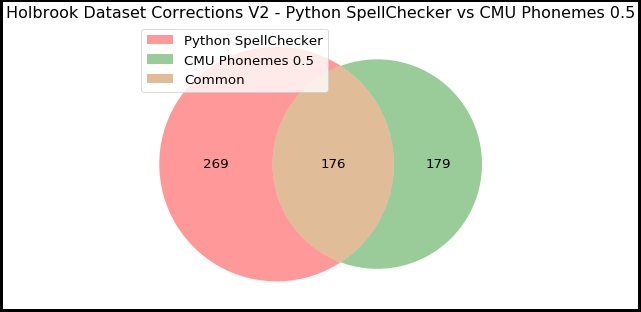

In [552]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(8, 8), dpi=60)
venn2(subsets=(269,179,176), set_labels=('','',''))
plt.legend(labels=['Python SpellChecker', 'CMU Phonemes 0.5','Common'])
plt.title('Holbrook Dataset Corrections V2 - Python SpellChecker vs CMU Phonemes 0.5')
plt.show()

#### Elsa's Results

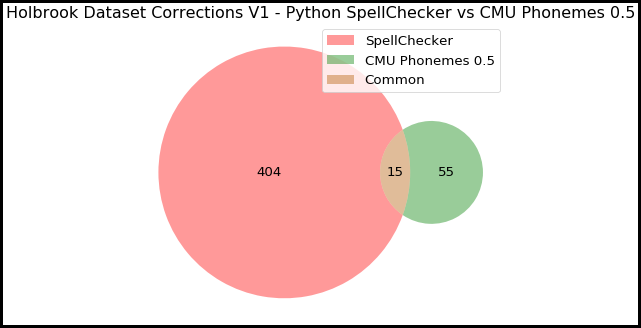

In [553]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(8, 8), dpi=60)
venn2(subsets=(404,55,15), set_labels=('','',''))
plt.legend(labels=['SpellChecker', 'CMU Phonemes 0.5','Common'])
plt.title('Holbrook Dataset Corrections V1 - Python SpellChecker vs CMU Phonemes 0.5')
plt.show()

### Overlap Holbrook - SymSpell vs CMU 0.5 (Phoneme Correction with frequency dictionary)

In [227]:
overlap(holbrook_symspell, holbrook_phonemes, 'symspell', 'cmu_phonemes', 'holbrook', 'symspell_cmu_phonemes')

{'both': 179, 'symspell': 250, 'cmu_phonemes': 176}

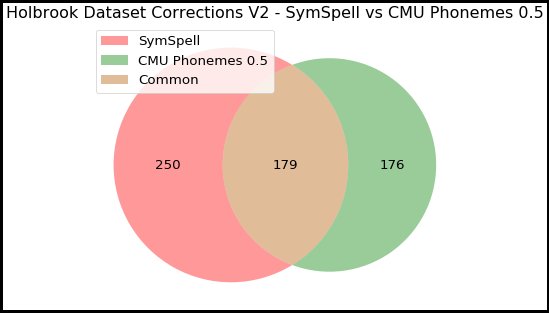

In [554]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(8, 8), dpi=60)
venn2(subsets=(250,176,179), set_labels=('','',''))
plt.legend(labels=['SymSpell', 'CMU Phonemes 0.5','Common'])
plt.title('Holbrook Dataset Corrections V2 - SymSpell vs CMU Phonemes 0.5')
plt.show()

### Overlap Holbrook - SymSpell vs Phoneme 0.5 (using symspell dict for phonemes instead of cmu)

In [264]:
frequency_dict_name = "frequency_dictionary_en_82_765.txt"
freq_dict_path = "/Users/robertyoung/git_repos/nlp_phoneme_spelling/input_files/"
file_path = freq_dict_path + frequency_dict_name

In [266]:
def extract_words_freq_dict():
    with open(file_path, "r") as file:
        output_file = open('frequency_dict_word_list.txt', 'a')
        for line in file:
            line = line.split()[0] + '\n'
            output_file.write(line)

In [319]:
frequency_dict_phonemes = "frequency_dict_word_list_phonemes.txt"
frequency_dict_default = "frequency_dict.txt"
freq_dict_path_phonemes = "/Users/robertyoung/git_repos/nlp_phoneme_spelling/g2p_files/"
freq_dict_path_default = "/Users/robertyoung/git_repos/nlp_phoneme_spelling/input_files/"
file_path_phonemes = freq_dict_path_phonemes + frequency_dict_phonemes
file_path_default = freq_dict_path_default + frequency_dict_default

In [356]:
def format_phoneme_freq_dict():
    freq_dict = pickle.load(open(file_path_default, "rb"))
    freq_dict['the'] = 23135851162
    del freq_dict['\ufeffthe']
    freq_dict_phonemes = open("frequency_dict_with_phonemes.txt", "w")
    with open(file_path_phonemes, 'r') as file:
        all_lines = file.read().splitlines() 
        for line in all_lines:
            word = (line.split(' ',1)[0])
            phoneme = (line.split(' ',1)[1])
            count = freq_dict[word]
            new_line = word + ',' + phoneme + ',' + str(count)
            freq_dict_phonemes.write(new_line)
            freq_dict_phonemes.write('\n')
            
        freq_dict_phonemes.close()

In [391]:
from pathlib import Path
from spellchecker import SpellChecker
import pkg_resources
from symspellpy_phonemes import SymSpell, Verbosity
import pickle
import sys
sys.path.append("..") # Adds higher directory to python modules path.

output_path_files = "/Users/robertyoung/git_repos/nlp_phoneme_spelling/input_files/spelling_correction_dicts"
input_path_files = "/Users/robertyoung/git_repos/nlp_phoneme_spelling/input_files/" # path format mac

def create_sym_object():
    sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=15)
    dictionary_path = pkg_resources.resource_filename('symspellpy_phonemes',"frequency_dict_with_phonemes.txt")
    sym_spell.load_dictionary(dictionary_path, term_index=1, count_index=2)

    return sym_spell

In [392]:
sym_spell = create_sym_object()

In [398]:
def add_phonemes(input_dict, name):
    input_path = "/Users/robertyoung/git_repos/nlp_phoneme_spelling/g2p_files/"
    file_name = name + "_phonemes.txt"
    file = Path(input_path) / file_name
    current_dict = input_dict.copy()
    keys_order = []
    for keys in current_dict.keys():
        keys_order.append(keys)

    with open(file, "r") as phonemes_list:
        i = 0
        for line in phonemes_list:
            line = line.rstrip("\n").split(" ", 1)
            word, phoneme = line[0], line[1]
            current_dict[keys_order[i]]['phoneme_rep'] = phoneme
            current_dict[keys_order[i]]['suggested'] = ""
            i += 1

    return current_dict

In [399]:
input_path_files = "/Users/robertyoung/git_repos/nlp_phoneme_spelling/input_files/spelling_correction_dicts/"
holbrook_template_name = 'holbrook_template_dict.txt'
holbrook_template_path = input_path_files + holbrook_template_name
holbrook_template = pickle.load(open(holbrook_template_path, "rb"))

In [400]:
holbrook_phonemes = add_phonemes(holbrook_template, 'holbrook')

In [404]:
def symspell_dict(working_dict, sym_spell):

    for misspelling, details in working_dict.items():
        input_term = misspelling.replace("_", " ")
        suggestion = sym_spell.lookup(input_term, Verbosity.CLOSEST, max_edit_distance=2)
        suggestions = []


        if len(suggestion) == 0:
            working_dict[misspelling]['suggested'] = ""
            working_dict[misspelling]['candidates'] = ""
        if len(suggestion) == 1:
            working_dict[misspelling]['suggested'] = str(suggestion[0]).split(',')[0]
            working_dict[misspelling]['candidates'] = ""
        if len(suggestion) > 1:
            for symspell_suggest in suggestion:
                suggestions.append(str(symspell_suggest).split(',')[0])
            working_dict[misspelling]['suggested'] = suggestions[0]
            working_dict[misspelling]['candidates'] = suggestions

    return working_dict

## Birckbeck

In [526]:
input_path_files = "/Users/robertyoung/git_repos/nlp_phoneme_spelling/input_files/spelling_correction_dicts/"

In [527]:
file_name_b_pyspell = "birkbeck_pyspell_dict.txt"
birkbeck_pyspell = pickle.load(open(input_path_files + file_name_b_pyspell, "rb"))

In [528]:
file_name_b_symspell = "birkbeck_symspell_dict.txt"
birkbeck_symspell = pickle.load(open(input_path_files + file_name_b_symspell, "rb"))

In [529]:
file_name_b_phonemes = "birkbeck_phonemes_sym.txt"
birkbeck_phonemes = pickle.load(open(input_path_files + file_name_b_phonemes, "rb"))

In [530]:
df_spellcheck_vs_cmu = pd.DataFrame(columns=['Spelling Application', 'Correct', 'Luck', 'Correct_and_Luck'])

In [531]:
results_data = []

In [532]:
results_data.append(score_application('PySpell', birkbeck_pyspell))

In [533]:
results_data.append(score_application('CMU Phonemes', birkbeck_phonemes))

In [534]:
results_data.append(score_application('SymSpell', birkbeck_symspell))

In [535]:
df_spellcheck_vs_cmu.append(results_data)

,Spelling Application,Correct,Luck,Correct_and_Luck
0,PySpell,11767,14148,25915
1,CMU Phonemes,9048,718,9766
2,SymSpell,11773,6653,18426


### Overlap Holbrook - PySpell vs CMU 0.5 (Phoneme Correction with frequency dictionary)

In [537]:
overlap(birkbeck_pyspell, birkbeck_phonemes, 'pyspell', 'cmu_phonemes', 'birkbeck', 'pyspell_cmu_phonemes')

{'both': 5477, 'pyspell': 6290, 'cmu_phonemes': 3571}

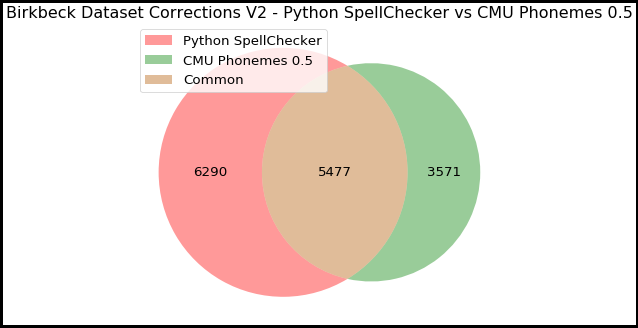

In [551]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(8, 8), dpi=60)
venn2(subsets=(6290,3571,5477), set_labels=('','',''))
plt.legend(labels=['Python SpellChecker', 'CMU Phonemes 0.5','Common'])
plt.title('Birkbeck Dataset Corrections V2 - Python SpellChecker vs CMU Phonemes 0.5')
plt.show()

### Overlap Holbrook - SymSpell vs CMU 0.5 (Phoneme Correction with frequency dictionary)

In [544]:
overlap(birkbeck_symspell, birkbeck_phonemes, 'symspell', 'cmu_phonemes', 'birkbeck', 'symspell_cmu_phonemes')

{'both': 5544, 'symspell': 6229, 'cmu_phonemes': 3504}

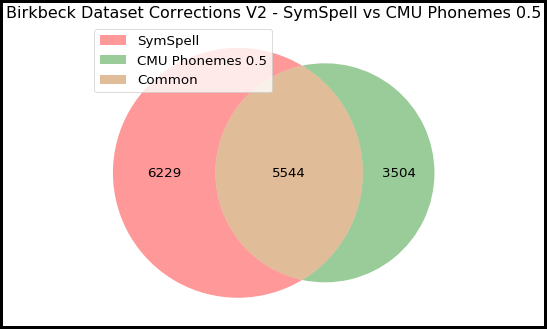

In [555]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(8, 8), dpi=60)
venn2(subsets=(6229,3504,5544), set_labels=('','',''))
plt.legend(labels=['SymSpell', 'CMU Phonemes 0.5','Common'])
plt.title('Birkbeck Dataset Corrections V2 - SymSpell vs CMU Phonemes 0.5')
plt.show()

# Zeeko

In [587]:
input_path_files = "/Users/robertyoung/git_repos/nlp_phoneme_spelling/input_files/spelling_correction_dicts/"

In [588]:
file_name_z_pyspell = "zeeko_pyspell_dict.txt"
zeeko_pyspell = pickle.load(open(input_path_files + file_name_z_pyspell, "rb"))

file_name_z_symspell = "zeeko_symspell_dict.txt"
zeeko_symspell = pickle.load(open(input_path_files + file_name_z_symspell, "rb"))

file_name_z_phonemes = "zeeko_phonemes_sym.txt"
zeeko_phonemes = pickle.load(open(input_path_files + file_name_z_phonemes, "rb"))

In [589]:
df_spellcheck_vs_cmu = pd.DataFrame(columns=['Spelling Application', 'Correct', 'Luck', 'Correct_and_Luck'])
results_data = []
results_data.append(score_application('PySpell', zeeko_pyspell))
results_data.append(score_application('CMU Phonemes', zeeko_phonemes))
results_data.append(score_application('SymSpell', zeeko_symspell))
df_spellcheck_vs_cmu.append(results_data)

,Spelling Application,Correct,Luck,Correct_and_Luck
0,PySpell,116,142,258
1,CMU Phonemes,77,15,92
2,SymSpell,119,90,209


In [590]:
overlap(zeeko_pyspell, zeeko_phonemes, 'pyspell', 'cmu_phonemes', 'zeeko', 'pyspell_cmu_phonemes')

{'both': 52, 'pyspell': 64, 'cmu_phonemes': 25}

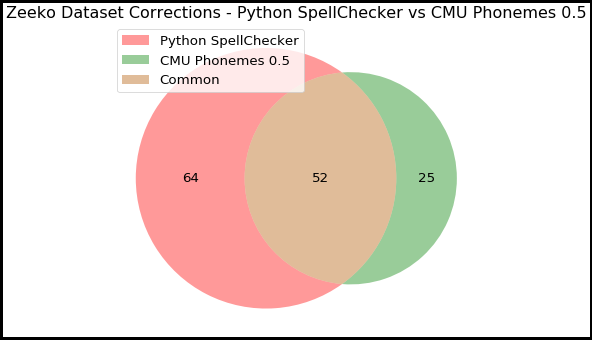

In [591]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(8, 8), dpi=60)
venn2(subsets=(64,25,52), set_labels=('','',''))
plt.legend(labels=['Python SpellChecker', 'CMU Phonemes 0.5','Common'])
plt.title('Zeeko Dataset Corrections - Python SpellChecker vs CMU Phonemes 0.5')
plt.show()

In [592]:
overlap(zeeko_symspell, zeeko_phonemes, 'symspeell', 'cmu_phonemes', 'zeeko', 'symspell_cmu_phonemes')

{'both': 57, 'symspeell': 62, 'cmu_phonemes': 20}

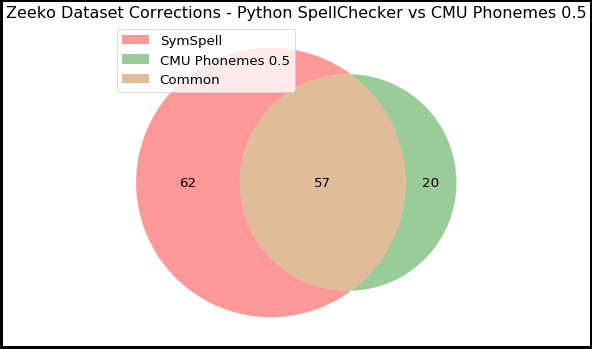

In [593]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(8, 8), dpi=60)
venn2(subsets=(62,20,57), set_labels=('','',''))
plt.legend(labels=['SymSpell', 'CMU Phonemes 0.5','Common'])
plt.title('Zeeko Dataset Corrections - Python SpellChecker vs CMU Phonemes 0.5')
plt.show()